In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [75]:
img=cv2.imread('D:/dataset/faces/asian/gettyimages-75405062-612x612 (1).jpg')

In [76]:
img.shape

(612, 408, 3)

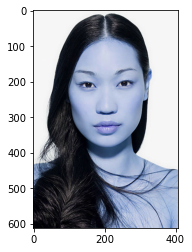

In [77]:
plt.imshow(img)

In [78]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(612, 408)

In [79]:
gray

array([[246, 246, 246, ..., 246, 246, 246],
       [246, 246, 246, ..., 246, 246, 246],
       [246, 246, 246, ..., 246, 246, 246],
       ...,
       [  3,   3,   2, ..., 199, 202, 201],
       [  8,   6,   5, ..., 198, 200, 202],
       [ 13,   8,   6, ..., 198, 198, 204]], dtype=uint8)

In [80]:
face_cascade = cv2.CascadeClassifier('D:/dataset/validation/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('D:/dataset/validation/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 64, 100, 273, 273]], dtype=int32)

In [81]:
(x,y,w,h) = faces[0]
x,y,w,h

(64, 100, 273, 273)

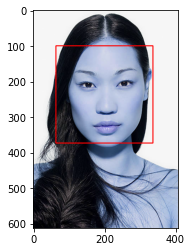

In [82]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

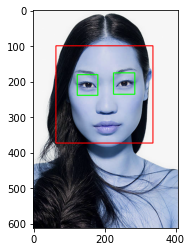

In [83]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

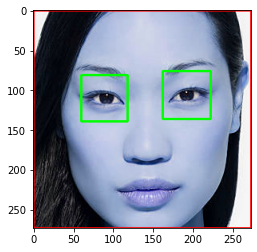

In [84]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [85]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

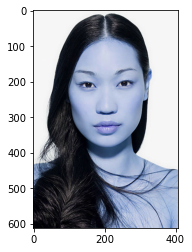

In [86]:
original_image = cv2.imread('D:/dataset/faces/asian/gettyimages-75405062-612x612 (1).jpg')
plt.imshow(original_image)

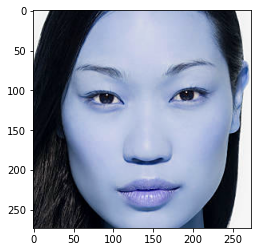

In [87]:
cropped_image = get_cropped_image_if_2_eyes('D:/dataset/faces/asian/gettyimages-75405062-612x612 (1).jpg')
plt.imshow(cropped_image)

In [88]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('D:/dataset/faces/asian/gettyimages-75405211-612x612.jpg')
cropped_image_no_2_eyes

In [89]:
path_to_data = "D:/dataset/faces/"
path_to_cr_data = "D:/dataset/faces/crop"

In [125]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [126]:
img_dirs

['D:/dataset/faces/asian',
 'D:/dataset/faces/black',
 'D:/dataset/faces/cropasian',
 'D:/dataset/faces/cropblack',
 'D:/dataset/faces/indian',
 'D:/dataset/faces/white']

In [127]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [128]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

asian
black
cropasian
Generating cropped images in folder:  D:/dataset/faces/cropcropasian
cropblack
indian
Generating cropped images in folder:  D:/dataset/faces/cropindian
white
Generating cropped images in folder:  D:/dataset/faces/cropwhite


In [129]:
import pywt

In [130]:
import numpy as np
import cv2

In [131]:
def w2d(img,mode='haar',level=1):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_BGR2GRAY)
    imArray=np.float32(imArray)
    imArray/=255
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H*=255;
    imArray_H=np.uint8(imArray_H)
    return imArray_H
    

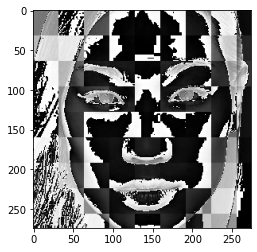

In [132]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [134]:
class_dict={}
c=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=c
    c+=1
class_dict

{'asian': 0,
 'black': 1,
 'cropasian': 2,
 'cropblack': 3,
 'indian': 4,
 'white': 5}

In [136]:
X=[]
Y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scalled_raw_image=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_image.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(celebrity_name)

In [138]:
len(X[0])

4096

In [142]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(654, 4096)

In [144]:
from sklearn.svm import SVC

In [253]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report

In [254]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

In [255]:
pipe=Pipeline([('scalar',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])

In [256]:
pipe.fit(X_train,Y_train)


Pipeline(steps=[('scalar', StandardScaler()), ('svc', SVC(C=10))])

In [257]:
pipe.score(X_test,Y_test)

0.9329268292682927

In [258]:
len(X_test)

164

In [294]:
print(classification_report(Y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

       asian       0.95      0.78      0.86        27
       black       0.93      1.00      0.97        14
   cropasian       1.00      1.00      1.00         1
      indian       0.93      1.00      0.97       100
       white       0.89      0.77      0.83        22

    accuracy                           0.93       164
   macro avg       0.94      0.91      0.92       164
weighted avg       0.93      0.93      0.93       164



In [283]:
pipe.predict(X_test)

array(['indian', 'indian', 'asian', 'indian', 'black', 'black', 'white',
       'indian', 'indian', 'indian', 'indian', 'indian', 'indian',
       'indian', 'indian', 'indian', 'indian', 'indian', 'indian',
       'black', 'indian', 'indian', 'indian', 'indian', 'indian',
       'indian', 'indian', 'indian', 'black', 'indian', 'indian',
       'indian', 'indian', 'indian', 'indian', 'white', 'indian',
       'indian', 'indian', 'black', 'asian', 'asian', 'white', 'white',
       'white', 'indian', 'white', 'white', 'indian', 'indian', 'indian',
       'indian', 'indian', 'cropasian', 'indian', 'black', 'indian',
       'indian', 'indian', 'asian', 'asian', 'indian', 'indian', 'black',
       'indian', 'asian', 'indian', 'indian', 'asian', 'indian', 'indian',
       'indian', 'white', 'indian', 'indian', 'white', 'indian', 'indian',
       'asian', 'indian', 'indian', 'indian', 'indian', 'indian',
       'indian', 'white', 'white', 'indian', 'white', 'indian', 'indian',
       'indian',

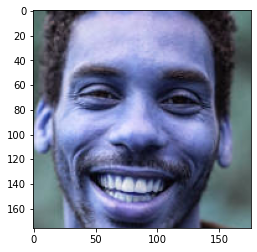

In [275]:
black1=cv2.imread('D:/dataset/faces/black/black4.png')
plt.imshow(black1)
gray = cv2.cvtColor(black1, cv2.COLOR_BGR2GRAY)

In [224]:
from sklearn.linear_model import LinearRegression
model=LinearRegression

In [291]:
import cv2
import tensorflow as tf

CATEGORIES = ["asian", "black","white","indian"]  # will use this to convert prediction num to string value


def prepare(filepath):
    IMG_SIZE = 70  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

In [154]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [162]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [167]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=2, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.889796,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.804082,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.891837,{'logisticregression__C': 1}


In [168]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [169]:
best_clf = best_estimators['svm']

In [171]:
best_estimators['svm'].score(X_test,Y_test)

0.9512195121951219

In [172]:
import joblib

In [173]:
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [174]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [2]:
from flask import Flask,jsonify,request

In [185]:
!pip install utils

In [181]:
!pip install pkg

In [187]:

import utils

In [3]:

app=Flask(__name__)
@app.route('/hello')
def hello():
    return "hi"
if __name__=="__main__":
    app.run(port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [22/May/2021 12:49:58] "GET /hello HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 12:49:58] "GET /favicon.ico HTTP/1.1" 404 -
